# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
# import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
# your answer here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [4]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
# your answer here
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [6]:
# your answer here
ny_state = temp[temp['State'] == 'New York']

ny_state

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [7]:
# your answer here
avg_temp = ny_state['Temperature'].mean()

avg_temp

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [11]:
# your answer here
over_15_c_s = temp[temp['Temperature'] > 15]

over_15_c_s[['City', 'State']]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [12]:
# your answer here
over_15_cities = temp[temp['Temperature'] > 15]['City']

over_15_cities

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [15]:
# your answer here
between_15_20 = temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]['City']

between_15_20

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [16]:
# your answer here
mean_state = temp.groupby('State')['Temperature'].mean()
std_state = temp.groupby('State')['Temperature'].std()

mean_state, std_state

(State
 Connecticut    15.833333
 New Jersey     21.111111
 New York       10.740741
 Name: Temperature, dtype: float64,
 State
 Connecticut    1.964186
 New Jersey     1.571348
 New York       8.133404
 Name: Temperature, dtype: float64)

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [17]:
# your answer here
employee = pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [18]:
# your answer here
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

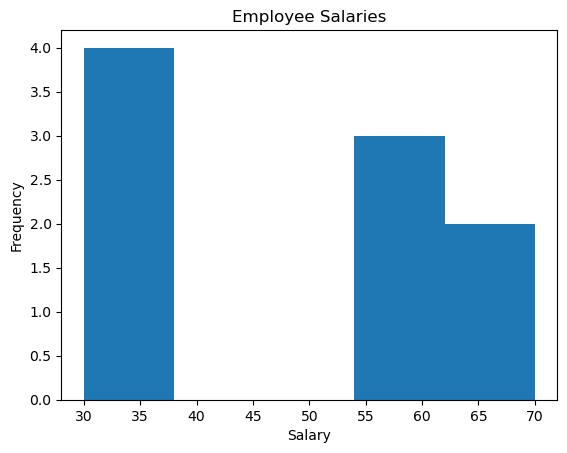

In [20]:
# your answer here
plt.hist(employee['Salary'], bins=5)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Employee Salaries')

plt.show()

#### What's the average salary in this company?

In [21]:
# your answer here
avg_salary = employee['Salary'].mean()

avg_salary

48.888888888888886

#### What's the highest salary?

In [22]:
# your answer here
high_salary = employee['Salary'].max()

high_salary

70

#### What's the lowest salary?

In [23]:
# your answer here
low_salary = employee['Salary'].min()

low_salary

30

#### Who are the employees with the lowest salary?

In [24]:
# your answer here
low_salary_employees = employee[employee['Salary'] == low_salary]

low_salary_employees[['Name']]

,Name
1,Maria
2,David


#### Could you give all the information about an employee called David?

In [25]:
# your answer here
david_info = employee[employee['Name'] == 'David']

david_info

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [26]:
# your answer here
david_salary = employee.loc[employee['Name'] == 'David', 'Salary'].values[0]

david_salary

30

#### Print all the rows where job title is associate

In [27]:
# your answer here
associate_rows = employee[employee['Title'] == 'Associate']

associate_rows

,Name,Department,Education,Gender,Title,Years,Salary


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [28]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [29]:
# your answer here- 2nd method
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [30]:
# your answer here
ass_over55_emp = employee.loc[(employee['Title'] == 'Associate') & (employee['Salary'] > 55000)]

ass_over55_emp

,Name,Department,Education,Gender,Title,Years,Salary


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [31]:
# your answer here
years_number = employee.groupby('Years')['Salary'].mean()

years_number

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [32]:
# your answer here
avg_salary_title = employee.groupby('Title')['Salary'].mean()

avg_salary_title

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

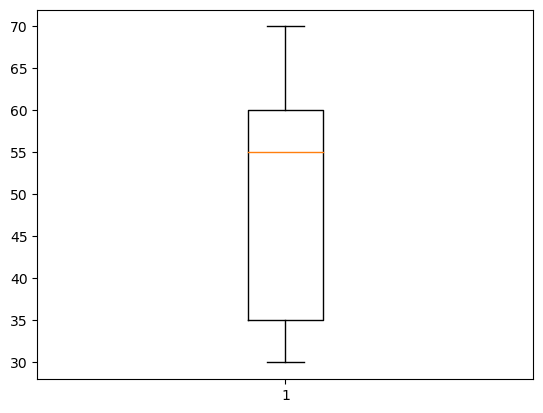

In [33]:
# draw boxplot here
plt.boxplot(employee['Salary'])

plt.show()

In [34]:
# print first quartile here
q1 = employee['Salary'].quantile(0.25)

q1

35.0

In [35]:
# print third quartile here
q3 = employee['Salary'].quantile(0.75)

q3

60.0

#### Is the mean salary per gender different?

In [29]:
# your answer here

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [30]:
# your answer here

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [ ]:
# your answer here

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
# your answer here

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [ ]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Select all the customers we have in Spain

In [ ]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here